# Algorism Study_forth week (08.24~08.31)
## CH7 & CH11 (Quicksort & Hash Tables)

## (CH7)
### 1. Quick Sort

#### Mergesort와 같이 분할-정복 Paradigm 이용 (속도가 매우 빠름)
* Divide   : A[P,Q-1], A[Q]. A[Q+1,R] 여기서 A[Q]가 pivot
* conquer  : A[P,Q-1] A[Q+1,R]를 순환호출로 sorting, divide 를 반복 (리스트의 크기가 0혹은 1일 될 때 까지)
* Combine  : 합치기

In [1]:
def quick_sort(A):
    if len(A) <= 1:
        return A
    pivot = A[len(A) // 2] # 중간을 똑 짜르기
    smaller_A, equal_A, Larger_A = [], [], []
    for num in A:
        if num < pivot:
            smaller_A.append(num)
        elif num > pivot:
            Larger_A.append(num)
        else:
            equal_A.append(num)
    return quick_sort(smaller_A) + equal_A + quick_sort(Larger_A) # combine 과정

In [14]:
A=[1,3,5,2,7,9,13]

### 단점
* 재귀 호출될 때 마다 새로운 리스트를 생성하여 리턴하기 때문에 메모리 사용 측면에서 비효율적
* 큰 사이즈의 입력 데이터를 다뤄야하는 상용 코드에서=> 추가 메모리 사용이 적은 in-place 정렬이 선호됨

In [23]:
def quick_sort2(arr):
    def sort(low, high):
        if high <= low:
            return

        mid = partition(low, high)
        sort(low, mid - 1)
        sort(mid, high)

    def partition(low, high):
        pivot = arr[(low + high) // 2]
        while low <= high:
            while arr[low] < pivot:
                low += 1
            while arr[high] > pivot:
                high -= 1
            if low <= high:
                arr[low], arr[high] = arr[high], arr[low]
                low, high = low + 1, high - 1
        return low

    return sort(0, len(arr) - 1)

### 설명

* 리스트의 정 가운데 있는 값을 pivot 값으로 선택합니다.

* 시작 인덱스(low)는 계속 증가 시키고, 끝 인덱스(high)는 계속 감소 시키기위한 while 루프를 두 인덱스가 서로 교차해서 지나칠 때까지 반복시킵니다.

* 시작 인덱스(low)가 가리키는 값과 pivot 값을 비교해서 더 작은 경우 반복해서 시작 인덱스 값을 증가시킵니다. (pivot 값보다 큰데 좌측에 있는 값을 찾기 위해)
* 끝 인덱스(high)가 가리키는 값과 pivot 값을 비교해서 더 작은 경우 반복해서 끝 인덱스 값을 감소시킵니다. (pivot 값보다 작은데 우측에 있는 값을 찾기 위해)
* 두 인덱스가 아직 서로 교차해서 지나치치 않았다면 시작 인덱스(low)가 가리키는 값과 끝 인덱스(high)가 가리키는 값을 상호 교대(swap) 시킵니다. (잘못된 위치에 있는 두 값의 위치를 바꾸기 위해)
* 상호 교대 후, 다음 값을 가리키기 위해 두 인덱스를 각자 진행 방향으로 한 칸씩 이동 시킵니다.
* 두 인덱스가 서로 교차해서 지나치게 되어 while 루프를 빠져나왔다면 다음 재귀 호출의 분할 기준점이될 시작 인덱스를 리턴합니다.

In [26]:
A=[1,3,5,2,7,9,13]
quick_sort2(A)
A

[1, 2, 3, 5, 7, 9, 13]

### 매번 pivot을 골랐는데 고를때마다 pivot이 최대값이 되는 경우가 발생할 수도 있기 때문에
### Randomized version of quicksort가 필요 (median값으로 설정 대신 random 하나 추가해주면됨)

In [31]:
def quick_sort_rand(arr):
    import random
    def sort(low, high):
        if high <= low:
            return

        mid = partition(low, high)
        sort(low, mid - 1)
        sort(mid, high)

    def partition(low, high):
        pivot = arr[random.randint(0,len(arr))]
        while low <= high:
            while arr[low] < pivot:
                low += 1
            while arr[high] > pivot:
                high -= 1
            if low <= high:
                arr[low], arr[high] = arr[high], arr[low]
                low, high = low + 1, high - 1
        return low

    return sort(0, len(arr) - 1)

In [32]:
A=[1,3,5,2,7,9,13]
quick_sort_rand(A)
A

[1, 2, 3, 5, 7, 9, 13]

## (CH11)
### 2. Hash Tables

#### 해시 테이블은 키(Key), 해시함수(Hash Function), 해시(Hash), 값(value), 저장소(Bucket, Slot)로 이루어져 있다. 
#### 키(key)는 해시함수(hash function)를 통해 해시(hash)로 변경이 되며 해시는 값(value)과 매칭되어 저장소에 저장이 된다.

* 키(key) : 해시함수의 input으로 고유한 값(다양한 길이) 해시 함수로 값을 바꾸어 저장이 되어야 공간의 효율성을 추구할 수 있다.


* 해시함수(Hash Function) : 키(key)를 해시(hash)로 바꿔줌. 다양한 길이를 가지고 있는 키(key)를 일정한 길이를 가지는 해시(hash)로 변경하여 저장소를 효율적으로 운영할 수 있도록 도와준다. 다만, 서로 다른 키(key)가 같은 해시(hash)가 되는 경우를 해시 충돌(Hash Collision)이라고 하는데, 해시 충돌을 일으키는 확률을 최대한 줄이는 함수를 만드는 것이 중요하다.


* 해시(Hash) : 해시 함수(Hash Function)의 결과물이며, 저장소(bucket, slot)에서 값(value)과 매칭되어 저장된다.


* 값(Value) : 저장소(bucket, slot)에 최종적으로 저장되는 값으로 키와 매칭되어 저장, 삭제, 검색, 접근이 가능해야 한다.


## 해시충돌 Solutions
### 1. Separate Chaining(Chaining)
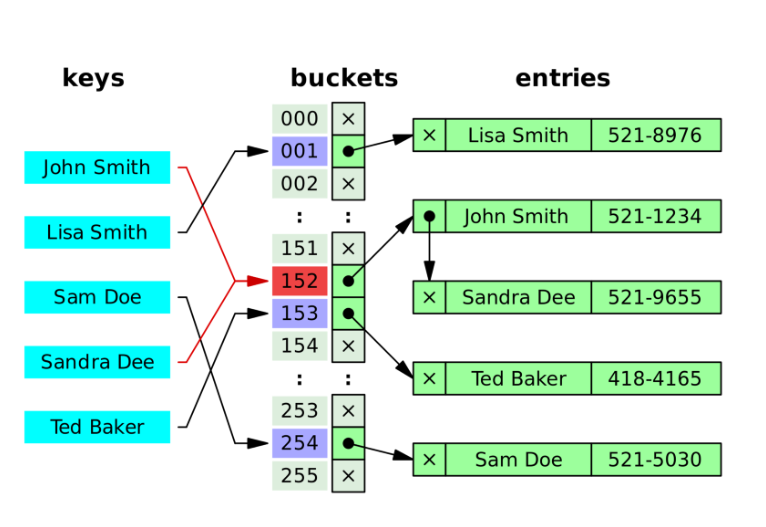

#### 위의 사진에서 Sandra를 저장할 때 충돌이 일어났고, 기존에 있던 John에 연결시켰다. 
#### 이 때 연결리스트(Linked List) 자료구조를 이용한다. 다음에 저장된 자료를 기존의 자료 다음에 위치시키는 것이다.
####  상대적으로 적은 메모리를 사용하지만 외부저장 공간을 사용하기 떄문에 이에 대한 작업을 추가로 해야한다는 단점이 있다.

# 2. Open Addressing(개방주소법)

#### 비어있는 해시(hash)를 찾아 데이터를 저장하는 기법

* 선형 탐색(Linear Probing): 다음 해시(+1)나 n개(+n)를 건너뛰어 비어있는 해시에 데이터를 저장한다.


* 제곱 탐색(Quadratic Probing): 충돌이 일어난 해시의 제곱을 한 해시에 데이터를 저장한다.


* 이중 해시(Double Hashing): 다른 해시함수를 한 번 더 적용한 해시에 데이터를 저장한다.

#### Probing
* 선형탐사
#### 최초 해시값에 해당하는 버킷에 다른 데이터가 저장돼 있으면 해당 해시값에서 고정 폭(예컨대 1칸)을 옮겨 다음 해시값에 해당하는 버킷에 액세스(삽입, 삭제, 탐색)합니다. 여기에 데이터가 있으면 고정폭으로 또 옮겨 액세스.
#### (특정 해시값 주변 버킷이 모두 채워져 있는 primary clustring 문제에 취약)


* 제곱탐사
#### 고정 폭으로 이동하는 선형 탐사와 달리 그 폭이 제곱수로 늘어난다는 특징이 있습니다. 예컨대 임의의 키값에 해당하는 데이터에 액세스할 때 충돌이 일어나면 12칸을 옮깁니다. 여기에서도 충돌이 일어나면 이번엔 22칸, 그 다음엔 32칸 옮기는 식 

#### (동일한 초기 해시값일때 취약)


* 이중해싱
#### 탐사할 해시값의 규칙성을 없애버려서 clustering을 방지하는 기법입니다. 2개의 해시함수를 준비해서 하나는 최초의 해시값을 얻을 때, 또 다른 하나는 해시충돌이 일어났을 때 탐사 이동폭을 얻기 위해 사용

## Hash Function

### 좋은함수: 특정 값에 치우치지 않고 해시값을 고르게 만들어내는 해시함수

#### 1. division method
####  m으로 나눈 나머지를 해시값으로 반환( m은 대개 Prime number, 2의 제곱수와 거리가 먼 소수를 사용하는 것이 좋다.)
#### 단점: 해시함수 특성 때문에 해시테이블 크기가 정해진다

#### 2. multiplication method
#### 숫자로 된 키가 k, 0~1 사이의 실수 A
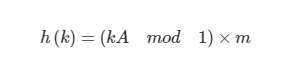

#### 나눗셈보다는 다소 느리지만 2진수 연산에 최적화한 컴퓨터 구조를 고려한 해시함수

#### 3. universal hasing (교재에는 없음)
#### 다수의 해쉬함수를 만들고 이 해시함수의 집합 H에서 무작위로 해시함수를 선택해 해시값을 만드는 기법
* 해시테이블의 크기 m을 소수로 정한다.
* 키값을 다음과 같이 r+1로 쪼갠다: $$ k_0 , k_1 ,..., k_r $$
* 0부터 m-1 사이의 정수 가운데 하나를 무작위로 뽑는다. 분리된 키값의 개수 (r+1)만큼 반복해서 뽑는다. 이를 $$ a=[a_0,a_1,...,a_r]$$ 로 둔다. 따라서 a의 경우의 수는 모두 m의 r+1승 가지이다.=> 해시함수의 집합 H의 요소 수 또한 m의 r+1승이다.
* 해시함수는 다음과 같다.

## 프로그래머스1번 (hash를 안쓰고 for문을 2개써서 속도가 안나옴 )-hash와 비교

In [363]:
def solution(participant, completion):
    answer = ''
    a = dict() 
    for i in range(0,len(participant)):
        if participant[i] not in completion:
            answer=participant[i]
        else:
            for j in participant: 
                if j not in a.keys(): 
                    a[j] = 0 
                else: 
                    answer=j
                  
    return answer

In [364]:
solution(participant,completion)

'mislav'

## hash를 쓰는 방법

In [3]:
participant=["mislav", "stanko", "mislav", "ana"]
completion=["stanko", "ana", "mislav"]
tmp = 0
a = dict()
for i in participant:
    a[hash(i)] = i
    tmp += int(hash(i))
    print(tmp)
for j in completion:
    tmp -= hash(j)
    print(tmp)
answer = a[tmp]
print(answer)

-1804875965791654016
-65697303007997071
-1870573268799651087
1122710065616840927
-616468597166816018
-3609751931583308032
-1804875965791654016
mislav


In [ ]:
def solution(participant, completion):
    answer = ''
    tmp = 0
    a = dict()
    for i in participant:
        a[hash(i)] = i
        tmp += int(hash(i))

    for j in completion:
        tmp -= hash(j)
    answer = a[tmp]
    return answer

## 프로그래머스 2번

In [336]:
# 숫자를 하나씩 늘려가면서 같은값 있는 지 확인한 후 있는거는 false
answer = True
a = {}
for i in phone_book:
    a[i] = hash(i)
#k도 하나의 list가 되기 떄문에(chr) 한개씩 뽑아서 더하면 뒤에 이어짐
for j in phone_book:
    tmp = ""
    for k in j:
        tmp += k
        if tmp in a and tmp != j:
            answer = False
        print(tmp)
        print(a)
        print(answer)

1
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
11
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
119
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
9
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
97
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
976
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
9767
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
97674
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
976742
{'119': -6700337944230775666, '97674223': 1544188840218172320, '1195524421': -4016435380051136663}
True
9767422
{'119': -67003379442

In [ ]:
def solution(phone_book):
    answer = True
    a = {}
    for i in phone_book:
        a[i] = hash(i)
    
    for j in phone_book:
        tmp = ""
        for k in j:
            tmp += k

        
            if tmp in a and tmp != j:
                answer = False
    return answer

## 프로그래머스 H-index

In [359]:
citations=[3,0,6,1,5]

def solution(citations):
    answer = 0
    n=len(citations)
    citations.sort()
    for i in range(0,n):
        if citations[i] >= (n-i): # h=5,4,3,2,1 역순으로
            return(n-i)
    return answer

In [360]:
solution(citations)

3